## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
from astropy.io import ascii

## Importing the dataset

In [44]:
from Preprocessor4 import get_combined_dataset
from Preprocessor4 import get_single_dataset
training_set = get_combined_dataset("training_data/Typ1_FFT20Pkt/test", 4, 12)
X_train = training_set.iloc[:, [3,4]].values
y_train = training_set.iloc[:, [1,2]].values
test_set = get_combined_dataset("training_data/Typ1_FFT20Pkt/test", 1, 3)
X_test = test_set.iloc[:, [3,4]].values
y_test = test_set.iloc[:, [1,2]].values

## Training the Neural Network model

In [71]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential(
    [
        layers.Dense(10, activation="relu", kernel_initializer='he_normal', input_shape=(2,), name="layer1"),
        layers.Dense(10, activation="relu", kernel_initializer='he_normal', name="layer2"),
        layers.Dense(2, name="layer3"),
    ]
)
model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.01))

In [72]:
model.fit(X_train, y_train, batch_size=512, epochs=200)

Epoch 1/200
44/44 [==============================] - 0s 1ms/step - loss: 9.9070
Epoch 2/200
44/44 [==============================] - 0s 1ms/step - loss: 1.8081
Epoch 3/200
44/44 [==============================] - 0s 1ms/step - loss: 1.7047
Epoch 4/200
44/44 [==============================] - 0s 1ms/step - loss: 1.7029
Epoch 5/200
44/44 [==============================] - 0s 1ms/step - loss: 1.6849
Epoch 6/200
44/44 [==============================] - 0s 878us/step - loss: 1.6693
Epoch 7/200
44/44 [==============================] - 0s 727us/step - loss: 1.6458
Epoch 8/200
44/44 [==============================] - 0s 727us/step - loss: 1.6287
Epoch 9/200
44/44 [==============================] - 0s 1ms/step - loss: 1.6153
Epoch 10/200
44/44 [==============================] - 0s 1ms/step - loss: 1.5680
Epoch 11/200
44/44 [==============================] - 0s 1ms/step - loss: 1.5062
Epoch 12/200
44/44 [==============================] - 0s 1ms/step - loss: 1.4011
Epoch 13/200
44/44 [===========

## Predicting the Test set results on independent test set

In [73]:
y_pred = model.predict(X_test)

In [74]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(mse)

0.732542090507453


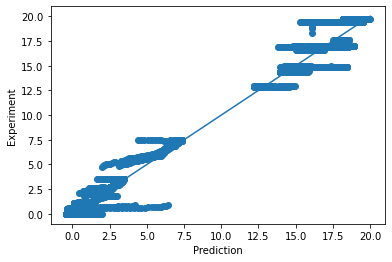

In [67]:
plt.scatter(y_pred, y_test)
plt.xlabel("Prediction")
plt.ylabel("Experiment")
plt.plot([0, 20], [0, 20])
plt.show()

In [68]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9056649580119362

In [69]:
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print(rmse)

0.5804941009049626


In [70]:
from sklearn.metrics import mean_absolute_error
mape = mean_absolute_error(y_test, y_pred)*100
print(mape)

34.26832544801977


# np.savetxt("nn2_test_train2test1_2output.txt", y_test)

In [138]:
np.savetxt("nn2_pred_train2test1_2output.txt", y_pred)